# Backpropagation Example1

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Value:
  def __init__(self,data , _children = () , _op = '' , lable = ''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda:None
    self._prev = set(_children)
    self._op = _op
    self.lable = lable

  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self , other):
    other = other if isinstance(other , Value) else Value(other)
    out = Value(self.data + other.data , (self , other) , '+')
    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad
    out._backward = _backward
    return out

  def __mul__(self , other):
    other = other if isinstance(other , Value) else Value(other)
    out = Value(self.data * other.data , (self , other) , '*')
    def _backward():
      self.grad += other.data*out.grad
      other.grad += self.data*out.grad
    out._backward = _backward
    return out
  def __rmul__(self , other):
    return self*other

  def __neg__(self):
    return self * -1

  def __sub__(self , other):
    return self + (-other)

  def __truediv__(self , other):
    return self * other**-1

  def __pow__(self , other):
    assert isinstance(other , (int , float)) , 'only support int or float'
    out = Value(self.data ** other, (self ,) , f'**{other}')

    def _backward():
      self.grad += (other * self.data**(other - 1))*out.grad
    out._backward = _backward
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x) , (self , ) , 'exp')
    def _backward():
      self.grad += out.data*out.grad
    out._backward = _backward
    return out

  def tanh(self):
    n = self.data
    t = (math.exp(2*n)-1)/(math.exp(2*n) +1)
    out = Value(t , (self , ) , 'tanh')
    def _backward():
      self.grad += (1 - t**2)*out.grad
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [3]:
from graphviz import Digraph
def trace(root):
  nodes, edges = set(), set()
  def build(v):
    # Check if v is a list and iterate through its elements
    if isinstance(v, list):
      for item in v:
        build(item)  # Recursively call build on each item
      return
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

  # Handle the case where root is a list
  if isinstance(root, list):
    # If root is a list, recursively call draw_dot on its elements
    for item in root:
      nodes, edges = trace(item)
      for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.lable, n.data, n.grad), shape='record')
        if n._op:
          dot.node(name=uid + n._op, label=n._op)
          dot.edge(uid + n._op, uid)
      for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.lable, n.data, n.grad), shape='record')
    if n._op:
      dot.node(name=uid + n._op, label=n._op)
      dot.edge(uid + n._op, uid)
  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  return dot

#Backpropagation example

In [4]:
# input x1 , x2 , x3
x1 = Value(2.0 , lable = 'x1')
x2 = Value(0.0 , lable = 'x2')
x3 = Value(-3.0 , lable = 'x3')
# weight w1 , w2, w3
w1 = Value(-3.0 , lable = 'w1')
w2 = Value(1.0 , lable = 'w2')
w3 = Value(0.5 , lable = 'w3')

# bias of neuron

b = Value(6.5434543234323432343 , lable = 'b')

x1w1 = x1*w1 ; x1w1.lable = 'x1w1'
x2w2 = x2*w2 ; x2w2.lable = 'x2w2'
x3w3 = x3*w3 ; x3w3.lable = 'x3w3'
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.lable = 'x1w1x2w2'

# Calculate the sum and assign it to a variable with a descriptive name
x1w1x2w2x3w3_sum =x1w1x2w2 + x3w3
x1w1x2w2x3w3_sum.lable = 'x1w1x2w2x3w3' # Assign the label to the sum

# Now use the sum in the next calculation
n = x1w1x2w2x3w3_sum + b
n.lable = 'n'

o = n.tanh() ; o.lable = 'o'

In [5]:
o.backward()

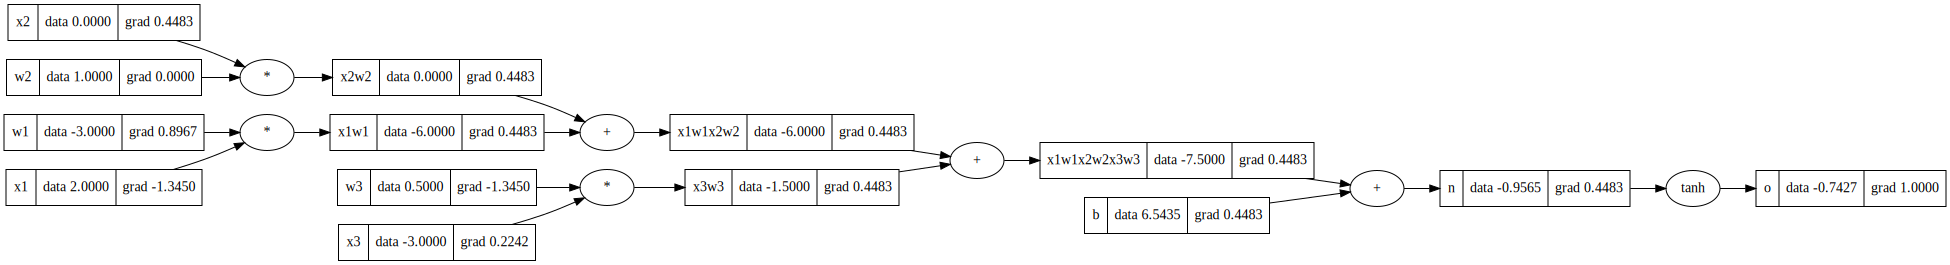

In [6]:
draw_dot(o)

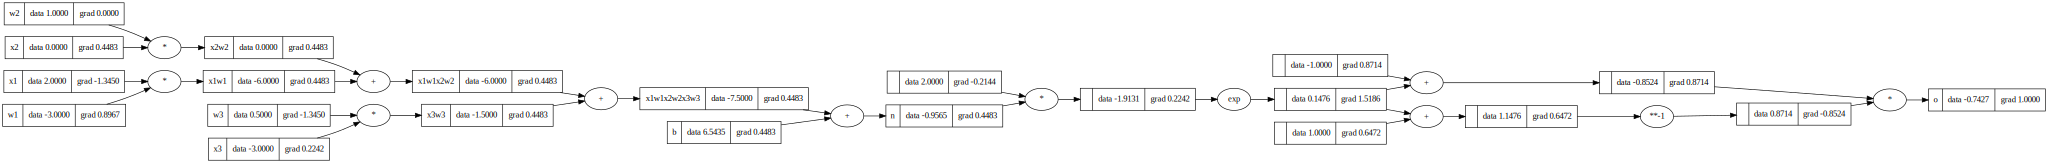

In [7]:
# input x1 , x2 , x3
x1 = Value(2.0 , lable = 'x1')
x2 = Value(0.0 , lable = 'x2')
x3 = Value(-3.0 , lable = 'x3')
# weight w1 , w2, w3
w1 = Value(-3.0 , lable = 'w1')
w2 = Value(1.0 , lable = 'w2')
w3 = Value(0.5 , lable = 'w3')

# bias of neuron

b = Value(6.5434543234323432343 , lable = 'b')

x1w1 = x1*w1 ; x1w1.lable = 'x1w1'
x2w2 = x2*w2 ; x2w2.lable = 'x2w2'
x3w3 = x3*w3 ; x3w3.lable = 'x3w3'
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.lable = 'x1w1x2w2'

# Calculate the sum and assign it to a variable with a descriptive name
x1w1x2w2x3w3_sum =x1w1x2w2 + x3w3
x1w1x2w2x3w3_sum.lable = 'x1w1x2w2x3w3' # Assign the label to the sum

# Now use the sum in the next calculation
n = x1w1x2w2x3w3_sum + b
n.lable = 'n'

e = (2*n).exp()
o = (e-1)/(e+1)
o.lable = 'o'
o.backward()
draw_dot(o)

# Same thing using Pytorch

In [8]:
import torch

In [9]:
x1 = torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad = True
x3 = torch.Tensor([-3.0]).double() ; x3.requires_grad = True
w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ; w2.requires_grad = True
w3 = torch.Tensor([0.5]).double() ; w3.requires_grad = True
b = torch.Tensor([6.5434543234323432343]).double() ; b.requires_grad = True
n = x1*w1 + x2*w2 + x3*w3
o  = torch.tanh(n + b)
print(o.data.item())
o.backward()


-0.7427321629408801


#building out a neural net library (multi-layer perceptron) in micrograd



In [10]:
class Neuron:
  def __init__(self , nin):
    self.wt = [Value(np.random.uniform(-1 , 1)) for _ in range(nin)]
    self.b = Value(np.random.uniform(-1 , 1))

  def __call__(self , x):
    act = sum((wi*xi for wi , xi in zip(self.wt , x)) , self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.wt + [self.b]

class Layers:
  def __init__(self , nin , nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self , x):
    outs = [n(x) for n in self.neurons]
    return outs if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  def __init__(self , nin , nouts):
    sz = [nin] + nouts
    self.layers  = [Layers(sz[i] , sz[i+1]) for i in range(len(nouts))]
  def __call__(self , x):
    for layers in self.layers:
      x = layers(x)
    return x

  def parameters(self):
    return [p for layers in self.layers for p in layers.parameters()]


In [11]:
x = [2.0 , 3.0]
n = MLP(3 , [4 , 4, 1])
n(x)

[Value(data = 0.9644656420698684)]

#•doing gradient descent optimization manually, training the network



In [12]:
xs = [
      [2.0 , 3.0 , -1.0],
      [3.0 , -1.0 , 0.5],
      [0.5 , 1.0 , 1.0],
      [1.0 , 1.0 , -1.0],
  ]
ys = [1.0 , -1.0 , -1.0 , 1.0]

In [13]:
for k in range(10):
  # loss = Value(0.0)  # Initialize loss as a Value object
  ypred = [n(x) for x in xs]
  # Extract the Value object from the list
  loss = sum(((yout[0] - ygt)**2 for ygt , yout in zip(ys , ypred)), Value(0.0))
  # loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  for p in n.parameters():
    p.data += -0.05*p.grad
  print(k , loss.data)

0 4.922572867648905
1 3.0352345139898915
2 1.2755683040309975
3 0.6399505179197325
4 0.3193102319673889
5 0.21040949392466518
6 0.16097430171119592
7 0.12912440544124582
8 0.10714464711240654
9 0.09118189836682114
